<a href="https://colab.research.google.com/github/cwmarris/pull-request-monitor/blob/master/Copy_of_OH_Binary_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification Models
- Author: Amy Zhuang
- Last Updated: May 2021

## Types Of Binary Classification Models

*   Logistic Regression: Logistic regression is a statistical model that uses logistic function to model the probability of an event happening. Logistic function is a s-shaped curve with the value ranges from 0 to 1.
*   Least Absolute Shrinkage and Selection Operator (LASSO) Regression: LASSO Regression is also called L1 regularization. It shrinks the model coefficients based on a penalty term added to the absolute values of the coefficients. Some of the coefficients may become zeros. So LASSO can do automatic variable selection and make a model simpler. The penalty parameter controls the strength of the l1 penalty. Large penalty parameter value means more coefficients will be set to zeros.
*   Ridge Regression: Ridge Regression is also called L2 regularization. It is similar to the LASSO regression in the sense that it can decrease the magnitude of model coefficients. It shrinks the model coefficients based on a penalty term added to the square of the coefficients. The penalty parameter controls the strength of the l2 penalty. Large penalty parameter value means more coefficients will be close to zeros, but they will not be set to zeros.
*   Elastic Net: Elastic net is a combination of LASSO and Ridge regression.
*   K Nearest Neighbors (KNN): KNN is a supervised machine learning model that makes prediction based on the values of neighbors. It is easy to implement and easy to understand, but can be slow for large datasets.
*   Support Vector Machine (SVM): SVM uses a hyperplane that maximize the distance between classes to make prediction.
*   Decision Tree: Uses a tree structure to split data and make predictions.
*   Random Forest: Random forest is an ensembled model with many decision tree models. The decision tree model were trained independently.
*   Extra Tree: Extra tree is also called extremely randomized trees. It is similar to the random forest. There are two major differences between the random forest and the extra tree model. Random forest uses a subset of the dataset for individual trees, while extra tree model uses all the data in the dataset for individual trees. Random forest split data based on best split of certain metrics, while extra tree split the data randomly.
*   Gradient Boosting Machine: Similar to the random forest, the gradient boosting machine is an ensembled model with many trees. Unlike the random forest, the trees in the gradient boosting machine are not independent. Each later tree is dependent on the error results of the previous tree. The model is trained in a sequential manner. Gradient descent is used to minimize the loss when adding new models.
*   XGBoost: XGBoost stands for eXtreme Gradient Boosting. It is a variation of the Gradient Boosting machine. It supports parrallel computing so it is much faster than GBM. It also has a more efficient optimization algrithm, so it usually produce better performance than GBM.
*   Naive Bayesian Model: Naive Bayesian Model is a model based on the Bayesian's Theorem. It is naive in the sense that it assumes the independence among predictors.

### A Deep Look at XGBoost
* Reference 1: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
* Reference 2: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

#### What makes XGBoost special?
**Gradient Boosting Types**
* Gradient boosting algorithm with learning rate
* Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.
* Regularized Gradient Boosting with L1 and L2
* Users can define custom optimization objectives and evaluation criteria.

**System Features**
* Parallelization of tree construction using all CPU cores during training.
* Distributed Computing for tranining very large models using a cluster of machines.
* Out-of-Core Computing for very large datasets that do not fit into memory
* Cache Optimization of data structures and algorithm to make best use of hardware.

**Algorithm Features**
* Sparse Aware implementation with automatic handling of missing data values.
* Block Structure to support the parallelization of tree constructions.
* Continued Training and can further boost an already fitted model on new data.
* Split to max_depth and prun the tree backwards. This helps to find potential positive gain after negative gain.
* Has built-in Cross-Validation

#### XGBoost Hyperparameters
**Overall Parameters**
* booster has two options: gbtree(default) is for tree-based models and gblinear is for linear models.
* slient controls the messages. Default is 0 and 1 means no messages will be printed.
* nthread automatically detects and uses all the cores available.

**Tree Parameters**
* num_boosting_rounds: number of trees
* eta/learning rate: learning rate with the default value of 0.3
* min_child_weight: minimum sum of weights of all observations required in a child. High values prevent overfitting and low values may cause under fitting
* max_depth: maximum depth of a tree.
* max_leaf_nodes: Maximum number of terminal nodes in a tree
* gamma: the minimum loss reduction required to make a split.
* subsample: Percentage of observations to be randomly sampled for each tree. Lower value can prevent overfitting. Typical 0.5-1
* colsample_bytree: Percentage of columns to be sampled for each tree
* colsample_bylevel: subsample ratio of columns for each split in each level.
* lambda/reg_lambda: L2 regularization term on weights. Default=1
* alpha/reg_alpha: L1 regularization term on weights. Default=0. Can be used for dimension reductiton. Default=0
* scale_pos_weight: helps imbalanced data to converge.
* max_delta_step: not commonly used.

**Optimization Parameter**
* objective: loss function to be minimized
 * binary:logistic-logistic regression for binary classification, returns predicted probability (not class)
 * multi: softmax–multiclass classification using the softmax objective, returns predicted class (not probabilities)
you also need to set an additional num_class (number of classes) parameter defining the number of unique classes
 * multi:softprob –same as softmax, but returns predicted probability of each data point belonging to each class.
* eval_metric [ default according to objective ]
 * The metric to be used for validation data.
 * The default values are rmse for regression and error for classification.
 * Typical values are:
   * rmse – root mean square error
   * mae – mean absolute error
   * logloss – negative log-likelihood
   * error – Binary classification error rate (0.5 threshold)
   * merror – Multiclass classification error rate
   * mlogloss – Multiclass logloss
   * auc: Area under the curve

#### Early Stopping
* Reference: https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/
* Early stopping is an approach to training complex machine learning models to avoid overfitting. It works by monitoring the performance of the model that is being trained on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations. It avoids overfitting by attempting to automatically select the inflection point where performance on the test dataset starts to decrease while performance on the training dataset continues to improve as the model starts to overfit. The performance measure may be the loss function that is being optimized to train the model (such as logarithmic loss), or an external metric of interest to the problem in general (such as classification accuracy).

This is a reference for feature importance of boosting: https://stats.stackexchange.com/questions/162162/relative-variable-importance-for-boosting

# Which Model to use?

If the project goal is to build a solid model with the performance as good as possible, and the project have time and resources for that, then try different models and see which one has the best performance.

If the project goal is to get insights from the model, logistic regression and its variations (LASSO, Ridge, Elastic Net) or decision tree model produces easy to interpret results.

If the time and resrouce is limited and you would like to run a quick model with decent results, use tree based models such as random forest or xgboost.

Or you can use ensemble models to incoporate every model in a meta model.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.ensemble import StackingClassifier

## Readin Data

In [ ]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [ ]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [ ]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target']=data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
df['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

## Standardization

In [ ]:
X_features = df[df.columns.difference(['target'])]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X_features),index=X_features.index,columns=X_features.columns)
# Note: For the datasets with outliers, standardize using Robust Scaler

Here is an explaination of standardization and normalization: https://www.statisticshowto.com/probability-and-statistics/normal-distributions/normalized-data-normalization/#:~:text=Normalization%20vs.&text=The%20terms%20normalization%20and%20standardization,a%20standard%20deviation%20of%201.

In [ ]:
X.describe()

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,mean perimeter,mean radius,mean smoothness,mean symmetry,mean texture,perimeter error,radius error,smoothness error,symmetry error,texture error,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-8.291551e-16,-3.921877e-16,-2.739461e-16,7.917900e-16,-3.366766e-16,-8.799835e-16,-1.120369e-15,9.732500e-16,-4.421380e-16,-1.453631e-15,-7.078891e-16,-3.162867e-15,6.132177e-15,-1.971670e-15,-6.530609e-15,1.773674e-15,-9.076415e-16,-7.541809e-16,-3.108234e-16,-8.853492e-16,5.049661e-16,-2.174788e-15,-1.412656e-16,6.856456e-16,2.575171e-15,-1.198026e-15,-2.333224e-15,-5.213170e-15,-2.289567e-15,1.763674e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-7.378291e-01,-1.298098e+00,-1.913447e+00,-1.057501e+00,-1.096968e+00,-1.454443e+00,-1.610136e+00,-1.261820e+00,-1.114873e+00,-1.819865e+00,-1.984504e+00,-2.029648e+00,-3.112085e+00,-2.744117e+00,-2.229249e+00,-1.044049e+00,-1.059924e+00,-1.776065e+00,-1.532890e+00,-1.554264e+00,-1.222423e+00,-1.443878e+00,-1.745063e+00,-1.305831e+00,-1.601839e+00,-1.693361e+00,-1.726901e+00,-2.682695e+00,-2.160960e+00,-2.223994e+00
25%,-4.947542e-01,-6.929263e-01,-6.744900e-01,-5.571612e-01,-5.851185e-01,-6.671955e-01,-7.470860e-01,-7.379438e-01,-7.437479e-01,-7.226392e-01,-6.919555e-01,-6.893853e-01,-7.109628e-01,-7.032397e-01,-7.259631e-01,-6.237679e-01,-6.235706e-01,-6.240183e-01,-6.516807e-01,-6.948092e-01,-6.421359e-01,-6.810833e-01,-7.563999e-01,-7.565142e-01,-6.919118e-01,-6.895783e-01,-6.749213e-01,-6.912304e-01,-6.418637e-01,-7.486293e-01
50%,-3.477828e-01,-2.810204e-01,-1.404958e-01,-1.990654e-01,-2.299405e-01,-2.951869e-01,-2.219405e-01,-3.977212e-01,-3.422399e-01,-1.782793e-01,-2.359800e-01,-2.150816e-01,-3.489108e-02,-7.162650e-02,-1.046362e-01,-2.866520e-01,-2.922452e-01,-2.203352e-01,-2.194304e-01,-1.974976e-01,-3.411812e-01,-2.695009e-01,-2.234689e-01,-2.182321e-01,-2.164441e-01,-2.859802e-01,-2.690395e-01,-4.684277e-02,-1.274095e-01,-4.351564e-02
75%,1.067726e-01,3.896541e-01,4.726567e-01,3.367521e-01,2.886421e-01,3.635073e-01,4.938569e-01,6.469351e-01,5.260619e-01,4.709834e-01,4.996769e-01,4.693926e-01,6.361990e-01,5.307792e-01,5.841756e-01,2.430307e-01,2.660996e-01,3.683553e-01,3.556925e-01,4.665523e-01,3.575891e-01,5.396688e-01,7.125100e-01,5.311411e-01,4.507624e-01,5.402790e-01,5.220158e-01,5.975448e-01,4.501382e-01,6.583411e-01
max,1.104184e+01,6.143482e+00,6.649601e+00,1.207268e+01,9.851593e+00,5.250529e+00,4.568425e+00,3.927930e+00,4.243589e+00,4.910919e+00,3.976130e+00,3.971288e+00,4.770911e+00,4.484751e+00,4.651889e+00,9.461986e+00,8.906909e+00,8.029999e+00,7.071917e+00,6.655279e+00,5.930172e+00,5.112877e+00,2.685877e+00,4.700669e+00,6.846856e+00,4.287337e+00,4.094189e+00,3.955374e+00,6.046041e+00,3.885905e+00


## Train Test Split

In [ ]:
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_test.shape

(114,)

## Logistic Regression

In [ ]:
# Check default values
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic = LogisticRegression(penalty='none', random_state=0).fit(X_train, y_train)
# penalty='none' means no regularization is applied
# C is the inverse of the regularization strength, so smaller number indicates stronger regularization.

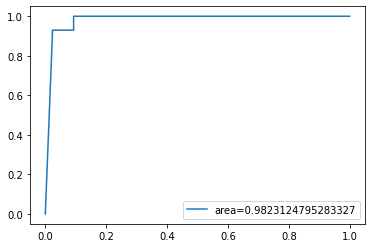

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=logistic.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, logistic.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        5        66


In [ ]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
log_loss(y_test,y_test_prob)

1.8278698068774815

In [ ]:
LogisticCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logistic.coef_))], axis = 1)
LogisticCoeff.columns=['Variable','Coefficient']
LogisticCoeff['Coefficient_Abs']=LogisticCoeff['Coefficient'].apply(abs)
LogisticCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
6,mean compactness,655.022921,655.022921
7,mean concave points,-614.851507,614.851507
16,radius error,-587.366254,587.366254
23,worst concavity,-553.175908,553.175908
3,concavity error,535.170188,535.170188
0,area error,-387.789294,387.789294
28,worst symmetry,-386.004515,386.004515
9,mean fractal dimension,-384.092942,384.092942
8,mean concavity,-319.132275,319.132275
15,perimeter error,276.486058,276.486058


To learn more about the interpretation of the logistic regression coefficient, check out his article: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

## Ridge

In [ ]:
ridge = LogisticRegression(penalty='l2', random_state=0).fit(X_train, y_train)
# penalty='l2' means Ridge regularization is applied

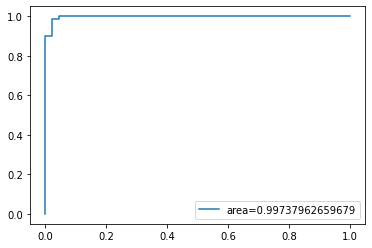

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=ridge.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.060113073797029216

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, ridge.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        1        70


In [ ]:
print(classification_report(y_test, ridge.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
ridgeCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ridge.coef_))], axis = 1)
ridgeCoeff.columns=['Variable','Coefficient']
ridgeCoeff['Coefficient_Abs']=ridgeCoeff['Coefficient'].apply(abs)
ridgeCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
29,worst texture,-1.353079,1.353079
16,radius error,-1.253200,1.253200
28,worst symmetry,-1.198184,1.198184
7,mean concave points,-1.106465,1.106465
23,worst concavity,-0.952964,0.952964
0,area error,-0.921905,0.921905
26,worst radius,-0.873394,0.873394
20,worst area,-0.842182,0.842182
8,mean concavity,-0.803748,0.803748
22,worst concave points,-0.778874,0.778874


## LASSO

In [ ]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=0).fit(X_train, y_train)
# penalty='l1' means LASSO regularization is applied
# solver is an algorithm to use in the optimization problem.
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
# ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
# ‘liblinear’ and ‘saga’ also handle L1 penalty
# ‘saga’ also supports ‘elasticnet’ penalty
# ‘liblinear’ does not support setting penalty='none'

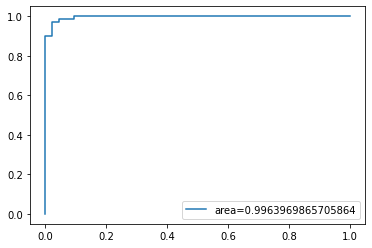

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=lasso.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.0688232967968902

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, lasso.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        42         1
true:yes        2        69


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, ridge.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        1        70


In [ ]:
print(classification_report(y_test, lasso.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
lassoCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lasso.coef_))], axis = 1)
lassoCoeff.columns=['Variable','Coefficient']
lassoCoeff['Coefficient_Abs']=lassoCoeff['Coefficient'].apply(abs)
lassoCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
16,radius error,-2.434460,2.434460
7,mean concave points,-2.383121,2.383121
20,worst area,-2.254291,2.254291
29,worst texture,-1.866220,1.866220
26,worst radius,-1.485869,1.485869
23,worst concavity,-1.299211,1.299211
28,worst symmetry,-1.019279,1.019279
1,compactness error,0.836973,0.836973
18,symmetry error,0.463489,0.463489
17,smoothness error,-0.439798,0.439798


## Elastic Net

In [ ]:
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=0).fit(X_train, y_train)
# solver is an algorithm to use in the optimization problem.
# For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
# For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
# ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
# ‘liblinear’ and ‘saga’ also handle L1 penalty
# ‘saga’ also supports ‘elasticnet’ penalty
# ‘liblinear’ does not support setting penalty='none'

# l1_ratio: The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'`. Setting ``l1_ratio=0 is equivalent to 
# using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


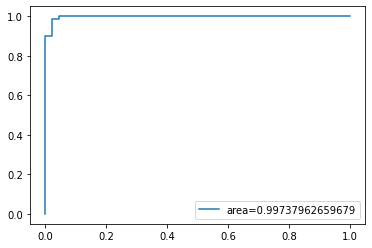

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=elasticNet.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.059659363767287636

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, elasticNet.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        42         1
true:yes        1        70


In [ ]:
print(classification_report(y_test, elasticNet.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
elasticNetCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(elasticNet.coef_))], axis = 1)
elasticNetCoeff.columns=['Variable','Coefficient']
elasticNetCoeff['Coefficient_Abs']=elasticNetCoeff['Coefficient'].apply(abs)
elasticNetCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
29,worst texture,-1.102539,1.102539
16,radius error,-1.020939,1.020939
28,worst symmetry,-0.937847,0.937847
7,mean concave points,-0.840223,0.840223
26,worst radius,-0.832168,0.832168
22,worst concave points,-0.805606,0.805606
23,worst concavity,-0.789594,0.789594
20,worst area,-0.777016,0.777016
0,area error,-0.719655,0.719655
27,worst smoothness,-0.688962,0.688962


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier().fit(X_train, y_train)

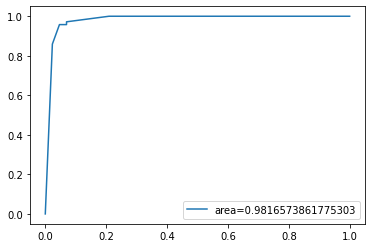

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=knn.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.3868538364954062

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, knn.predict(X_test))
cmtx = pd.DataFrame(confusion_matrix, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        3        68


In [ ]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



knn does not have coefficients: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV 
# LinearSVC does not provide predict_proba, this will scikit-learn provides 
# CalibratedClassifierCV which can be used to solve this problem: it allows 
# to add probability output to LinearSVC or any other classifier which implements 
# decision_function method

In [ ]:
 svm = LinearSVC(random_state = 42)
 svm.fit(X_train, y_train)
 clf = CalibratedClassifierCV(svm) 
 clf.fit(X_train, y_train)
 y_proba = clf.predict_proba(X_test)

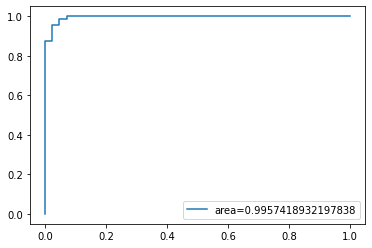

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=clf.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.11172695854794033

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        3        68


In [ ]:
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
svmCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(svm.coef_))], axis = 1)
svmCoeff.columns=['Variable','Coefficient']
svmCoeff['Coefficient_Abs']=svmCoeff['Coefficient'].apply(abs)
svmCoeff.sort_values(by='Coefficient_Abs', ascending=False)

,Variable,Coefficient,Coefficient_Abs
7,mean concave points,-1.292714,1.292714
16,radius error,-1.085787,1.085787
6,mean compactness,0.924964,0.924964
23,worst concavity,-0.844693,0.844693
29,worst texture,-0.785718,0.785718
28,worst symmetry,-0.780571,0.780571
0,area error,-0.757177,0.757177
20,worst area,-0.740594,0.740594
26,worst radius,-0.687682,0.687682
3,concavity error,0.595542,0.595542


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeClf = DecisionTreeClassifier(random_state=0)
treeClf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

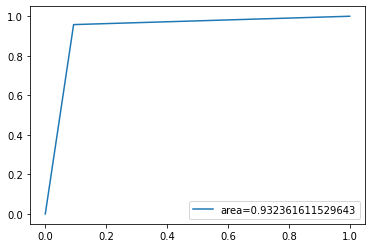

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=treeClf.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

2.120830115386804

In [ ]:
cm = confusion_matrix(y_test, treeClf.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        39         4
true:yes        3        68


In [ ]:
print(classification_report(y_test, treeClf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
treeCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(treeClf.feature_importances_))], axis = 1)
treeCoeff.columns=['Variable','Feature_Importance']
treeCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
7,mean concave points,0.691420
22,worst concave points,0.073720
29,worst texture,0.067854
26,worst radius,0.052299
25,worst perimeter,0.051494
4,fractal dimension error,0.018554
2,concave points error,0.015931
0,area error,0.011983
27,worst smoothness,0.009233
6,mean compactness,0.006276


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

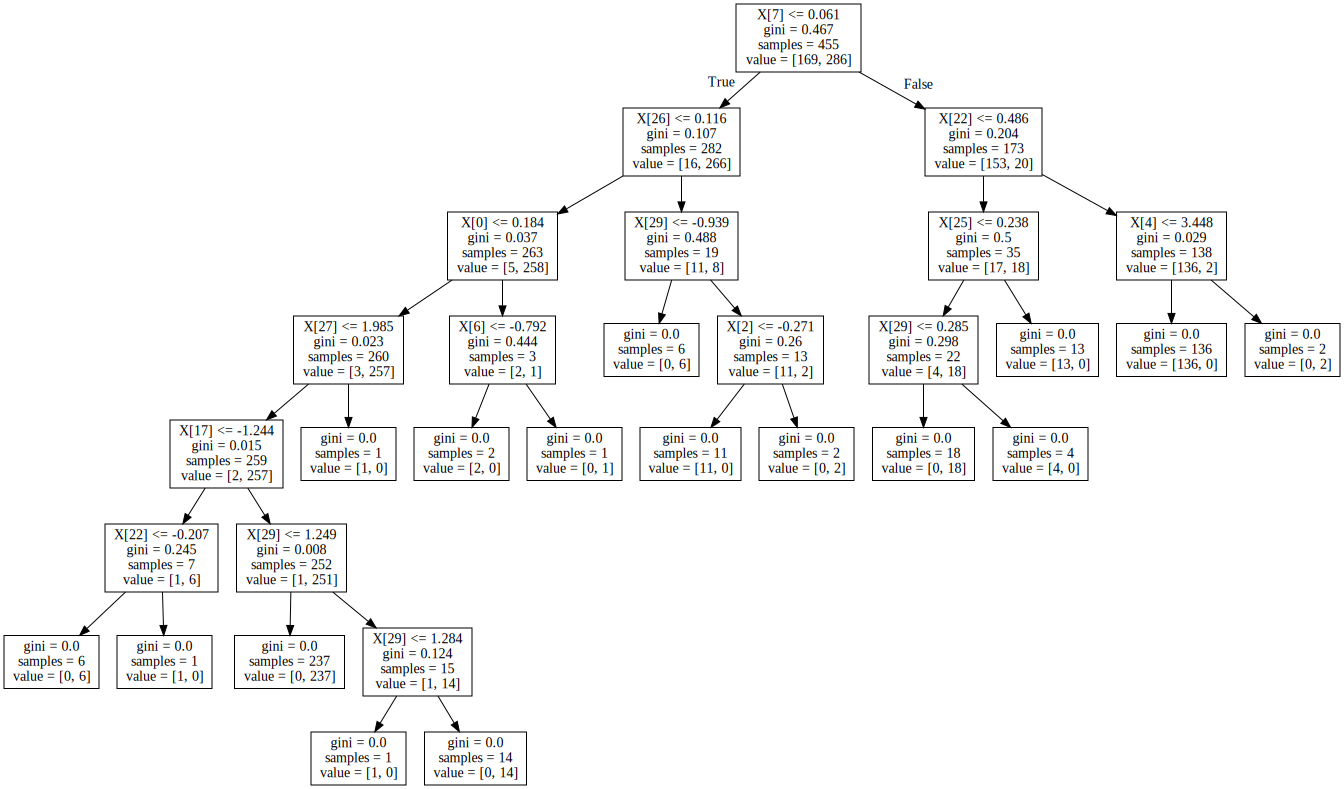

In [ ]:
export_graphviz(treeClf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1).fit(X_train,y_train)

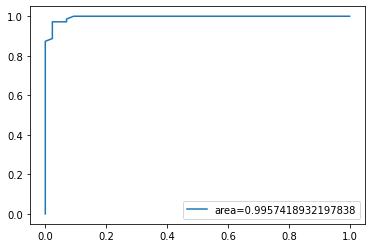

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.09530366381553619

In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        1        70


In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
rfCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf.feature_importances_))], axis = 1)
rfCoeff.columns=['Variable','Feature_Importance']
rfCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
22,worst concave points,0.132792
7,mean concave points,0.130294
20,worst area,0.107588
26,worst radius,0.101616
25,worst perimeter,0.101142
10,mean perimeter,0.066317
5,mean area,0.048780
8,mean concavity,0.036679
23,worst concavity,0.032749
0,area error,0.030068


To see how the feature importance are calculated, check out this:  https://mljar.com/blog/feature-importance-in-random-forest/

## Extra Tree

Extra Tree is also called Extreme Randomized Trees. Comparing to Random Forest


1.   When choosing variables at a split, samples are drawn from the entire training set instead of a bootstrap sample of the training set.
2.   Splits are chosen completely at random from the range of values in the sample at each split.



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
et = ExtraTreesClassifier(n_estimators=200, random_state=0, n_jobs=-1).fit(X_train,y_train)

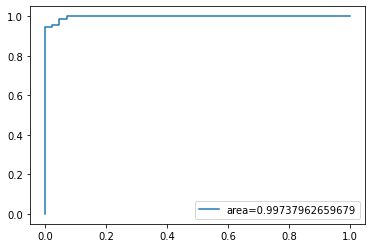

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=et.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.08844002670869902

In [ ]:
cm = confusion_matrix(y_test, et.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        1        70


In [ ]:
print(classification_report(y_test, et.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
etCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(et.feature_importances_))], axis = 1)
etCoeff.columns=['Variable','Feature_Importance']
etCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
22,worst concave points,0.106496
26,worst radius,0.096859
25,worst perimeter,0.090883
7,mean concave points,0.081943
20,worst area,0.076494
11,mean radius,0.061440
10,mean perimeter,0.056507
5,mean area,0.045632
8,mean concavity,0.043292
23,worst concavity,0.040792


## Gradient Boosting Machine (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, random_state=42).fit(X_train,y_train)

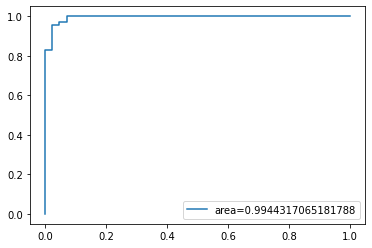

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=gb.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.14101327847160175

In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        1        70


In [ ]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
gbCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(gb.feature_importances_))], axis = 1)
gbCoeff.columns=['Variable','Feature_Importance']
gbCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
7,mean concave points,0.449199
22,worst concave points,0.240309
26,worst radius,0.075687
29,worst texture,0.052612
25,worst perimeter,0.051188
20,worst area,0.037637
23,worst concavity,0.018290
3,concavity error,0.015707
14,mean texture,0.015107
0,area error,0.009677


## XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_train, y_train)

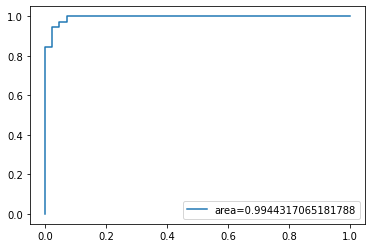

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=xgb.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.09738804417378433

In [ ]:
cm = confusion_matrix(y_test, xgb.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        2        69


In [ ]:
print(classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
xgbCoeff = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(xgb.feature_importances_))], axis = 1)
xgbCoeff.columns=['Variable','Feature_Importance']
xgbCoeff.sort_values(by='Feature_Importance', ascending=False)

,Variable,Feature_Importance
7,mean concave points,0.331756
22,worst concave points,0.222752
25,worst perimeter,0.098498
26,worst radius,0.074222
20,worst area,0.031044
29,worst texture,0.024402
14,mean texture,0.023178
23,worst concavity,0.021696
3,concavity error,0.018174
15,perimeter error,0.016355


Xgboost vs. GBM


*   Regularization
*   Paralell computing
*   Handles missing values
*   Second-order gradients (partial derivative of the loss function) provides more information for the directions of the gradient



## Naive Beyes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

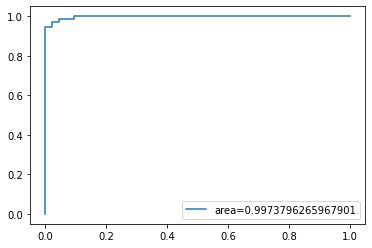

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=nb.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.20510070595645047

In [ ]:
cm = confusion_matrix(y_test, nb.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        40         3
true:yes        1        70


In [ ]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Training is fast because only the probability of each class and the probability of each class given different input (x) values need to be calculated. No coefficients need to be fitted by optimization procedures.

# Stacking Model

Stacking is an ensemble method that uses the predictions of individual machine learning models as the input of a meta model.

In [ ]:
estimator_list = [
    ('knn',knn),
    ('LASSO',lasso),
    ('Ridge',ridge),
    ('Random Forest',rf),
    ('Extra Tree', et),
    ('Gradient Boosting', gb),
    ('XGBoost', xgb),
    ('Naive Bayes',nb) ]

In [ ]:
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [ ]:
stack_model.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform')),
                               ('LASSO',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
              

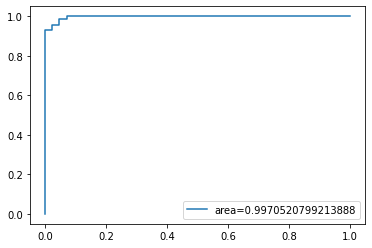

In [ ]:
#ROC/AUC Curve
from sklearn import metrics
y_test_prob=stack_model.predict_proba(X_test)[:,1]
fpr,tpr, _=metrics.roc_curve(y_test,y_test_prob)
auc=metrics.roc_auc_score(y_test,y_test_prob)
plt.plot(fpr,tpr,label="area="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
log_loss(y_test,y_test_prob)

0.08068273681545089

In [ ]:
cm = confusion_matrix(y_test, stack_model.predict(X_test))
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no        41         2
true:yes        1        70


In [ ]:
print(classification_report(y_test, stack_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

